In [4]:
import pandas as pd

# Lesen der Excel-Datei
datei_pfad = 'Stammdaten_Verkehrsdetektion_2022_07_20.xlsx'  # Passe die Dateiendung an, falls es sich um eine Excel-Datei handelt
df = pd.read_excel(datei_pfad)

# ersten 5 Zeilen
#df
df

,MQ_KURZNAME,DET_NAME_ALT,DET_NAME_NEU,DET_ID15,MQ_ID15,STRASSE,POSITION,POS_DETAIL,RICHTUNG,SPUR,annotation,LÄNGE (WGS84),BREITE (WGS84),INBETRIEBNAHME,ABBAUDATUM,DEINSTALLIERT,KOMMENTAR
0,TE001,TEU00002_Det0,TE001_Det_HF1,100101010000167,100201010000077,A115,AS Spanische Allee – Brücke,AK Zehlendorf,Südwest,HF_R,Hauptfahrbahn rechte Spur,13.192578,52.433868,2003-02-18,NaT,NaN,NaN
1,TE001,TEU00002_Det1,TE001_Det_HF2,100101010000268,100201010000077,A115,AS Spanische Allee – Brücke,AK Zehlendorf,Südwest,HF_2vR,"Hauptfahrbahn, 2. Spur von rechts",13.192578,52.433868,2003-02-18,NaT,NaN,NaN
2,TE002,TEU00002_Det2,TE002_Det_HF1,100101010000369,100201010000178,A115,AS Spanische Allee – Brücke,AD Funkturm,Nordost,HF_R,Hauptfahrbahn rechte Spur,13.192747,52.433813,2003-02-18,NaT,NaN,NaN
3,TE002,TEU00002_Det3,TE002_Det_HF2,100101010000470,100201010000178,A115,AS Spanische Allee – Brücke,AD Funkturm,Nordost,HF_2vR,"Hauptfahrbahn, 2. Spur von rechts",13.192747,52.433813,2003-02-18,NaT,NaN,NaN
4,TE004,TEU00004_Det0,TE004_Det_HF1,100101010000874,100201010000380,Clayallee,zwischen Scharfestraße und Propst-Süssmilch-We...,Potsdamer Chaussee,Süd,HF_R,Hauptfahrbahn rechte Spur,13.261301,52.436642,2003-02-18,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,TE583,teuscalaS00000DD00384D1,TE583_Det_HF2,100101010097975,100201010055348,Tempelhofer Damm,zwischen Burgemeisterstraße und Friedrich-Wilh...,Nord,Nord,HF_2vR,"Hauptfahrbahn, 2. Spur von rechts",13.384196,52.457440,2018-03-01,NaT,X,NaN
578,TE592,teuscalaS00000DD00391D0,TE592_Det_HF1,100101010099692,100201010056257,Kaiser-Friedrich-Straße,zwischen Schillerstraße und Pestalozzistraße,Süd,Süd,HF_R,Hauptfahrbahn rechte Spur,13.301719,52.509232,2018-04-27,NaT,X,NaN
579,TE592,teuscalaS00000DD00391D1,TE592_Det_HF2,100101010099793,100201010056257,Kaiser-Friedrich-Straße,zwischen Schillerstraße und Pestalozzistraße,Süd,Süd,HF_2vR,"Hauptfahrbahn, 2. Spur von rechts",13.301719,52.509232,2018-04-27,NaT,X,NaN
580,TE593,teuscalaS00000DD00392D0,TE593_Det_HF1,100101010099894,100201010056358,Kaiser-Friedrich-Straße,zwischen Pestalozzistraße und Schillerstraße,Nord,Nord,HF_R,Hauptfahrbahn rechte Spur,13.302183,52.508531,2018-04-27,NaT,X,NaN


### Längen und Breitengrade der Messpunkte

Wie Integration einer Karte, in bezug auf die Koordinaten

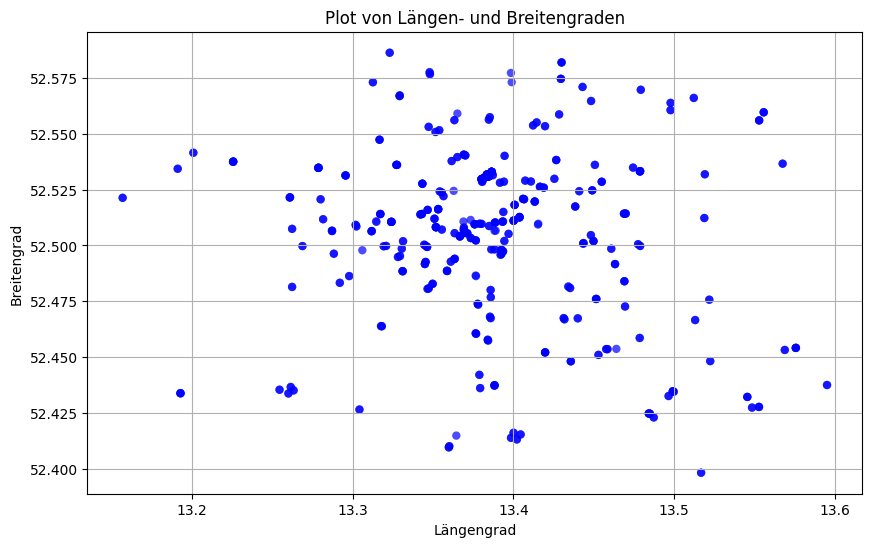

In [3]:
import matplotlib.pyplot as plt

# Beispiel: Annahme, dass die Spalten 'Länge' und 'Breite' genannt werden
# Passe die Namen der Spalten an, falls sie anders heißen
longitude_col = 'LÄNGE (WGS84)'  # Name der Spalte für Längengrade
latitude_col = 'BREITE (WGS84)'  # Name der Spalte für Breitengrade

# Plotten der Längen- und Breitengrade
plt.figure(figsize=(10, 6))
plt.scatter(df[longitude_col], df[latitude_col], c='blue', marker='o', edgecolor='none', alpha=0.7)
plt.title('Plot von Längen- und Breitengraden')
plt.xlabel('Längengrad')
plt.ylabel('Breitengrad')
plt.grid(True)
plt.show()

AttributeError: Stamen

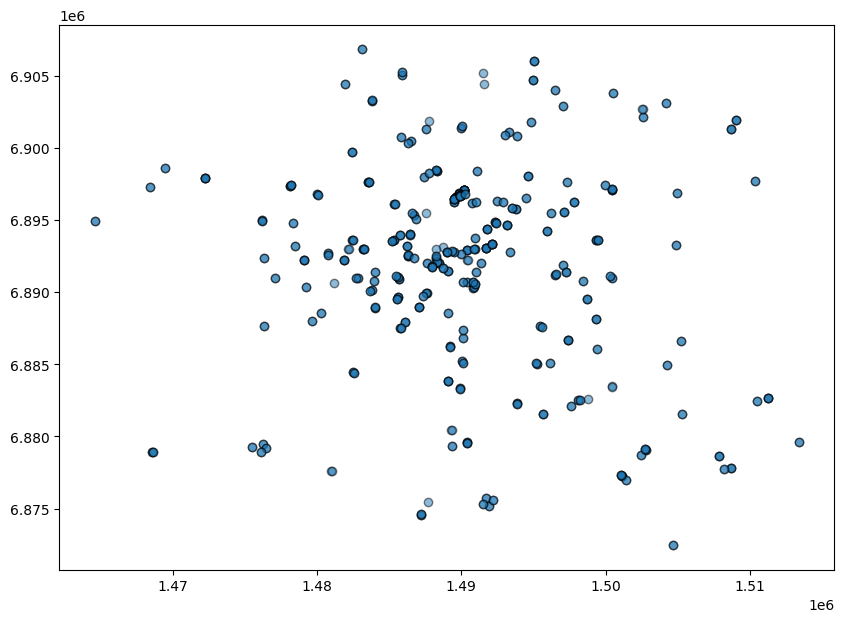

In [6]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Datei-Pfad zur Excel-Datei
datei_pfad = 'Stammdaten_Verkehrsdetektion_2022_07_20.xlsx'

# Lesen der Excel-Datei
df = pd.read_excel(datei_pfad)

# Beispielhafte Spaltennamen für Längengrade und Breitengrade
longitude_col = 'LÄNGE (WGS84)'  # Name der Spalte für Längengrade
latitude_col = 'BREITE (WGS84)'  # Name der Spalte für Breitengrade

# Erstellen eines GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df[longitude_col], df[latitude_col]))

# Festlegen des Koordinatensystems (WGS84)
gdf.set_crs(epsg=4326, inplace=True)

# Konvertieren in das Web Mercator Koordinatensystem (für contextily)
gdf = gdf.to_crs(epsg=3857)

# Plotten der Datenpunkte
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, alpha=0.5, edgecolor='k')

# Hinzufügen der Basiskarte
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

# Anzeigen des Plots
plt.show()

dict_keys(['OpenStreetMap', 'MapTilesAPI', 'OpenSeaMap', 'OPNVKarte', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Stadia', 'Thunderforest', 'BaseMapDE', 'CyclOSM', 'Jawg', 'MapBox', 'MapTiler', 'TomTom', 'Esri', 'OpenWeatherMap', 'HERE', 'HEREv3', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'GeoportailFrance', 'OneMapSG', 'USGS', 'WaymarkedTrails', 'OpenAIP', 'OpenSnowMap', 'AzureMaps', 'SwissFederalGeoportal', 'TopPlusOpen', 'Gaode', 'Strava', 'OrdnanceSurvey'])


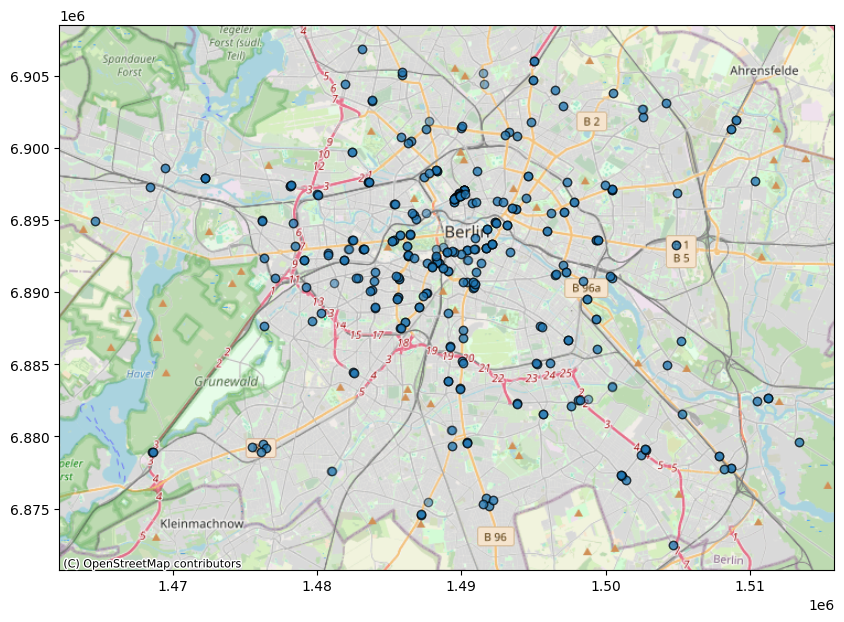

In [7]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Datei-Pfad zur Excel-Datei
datei_pfad = 'Stammdaten_Verkehrsdetektion_2022_07_20.xlsx'

# Lesen der Excel-Datei
df = pd.read_excel(datei_pfad)

# Beispielhafte Spaltennamen für Längengrade und Breitengrade
longitude_col = 'LÄNGE (WGS84)'  # Name der Spalte für Längengrade
latitude_col = 'BREITE (WGS84)'  # Name der Spalte für Breitengrade

# Erstellen eines GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df[longitude_col], df[latitude_col]))

# Festlegen des Koordinatensystems (WGS84)
gdf.set_crs(epsg=4326, inplace=True)

# Konvertieren in das Web Mercator Koordinatensystem (für contextily)
gdf = gdf.to_crs(epsg=3857)

# Plotten der Datenpunkte
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, alpha=0.5, edgecolor='k')

# Überprüfen der verfügbaren Kartenquellen
print(ctx.providers.keys())

# Verwendung einer funktionierenden Kartenquelle
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Anzeigen des Plots
plt.show()

Die Anzahl der Messpunkte ist zu gering, um über die Verkehrsdichte im allgemeinen eine Aussage treffen zu können.